<a href="https://colab.research.google.com/github/arshika77/snns_and_sdm_code_implementation/blob/master/SDM_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Memory Structure

**Architecture of Address Decoder Memory**

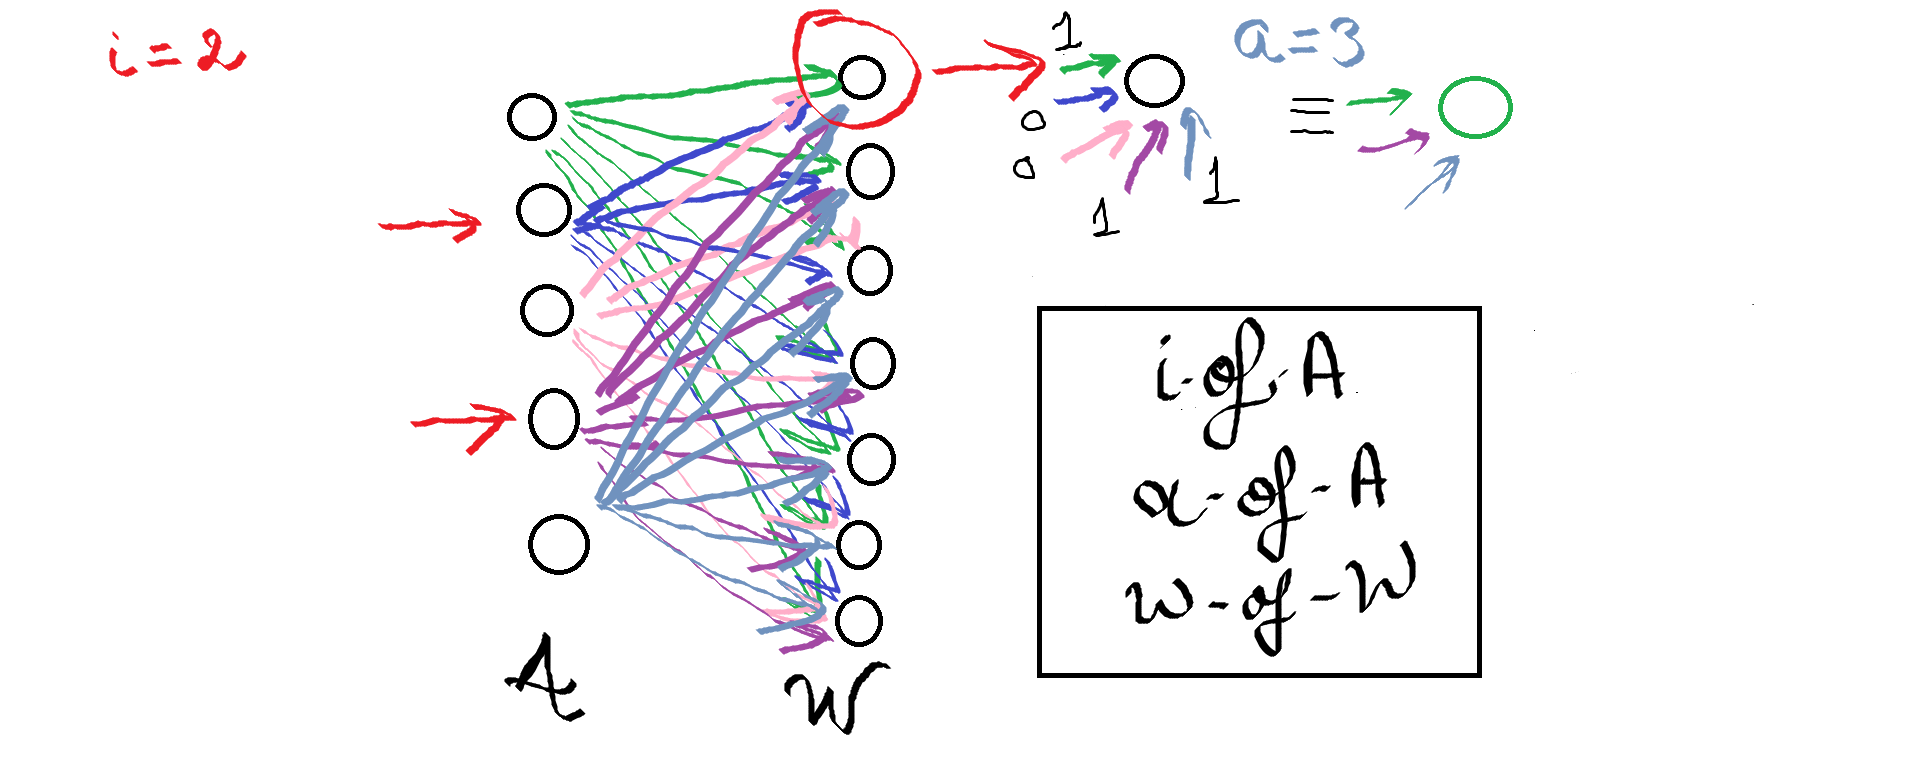

**Architecture of Data Memory**

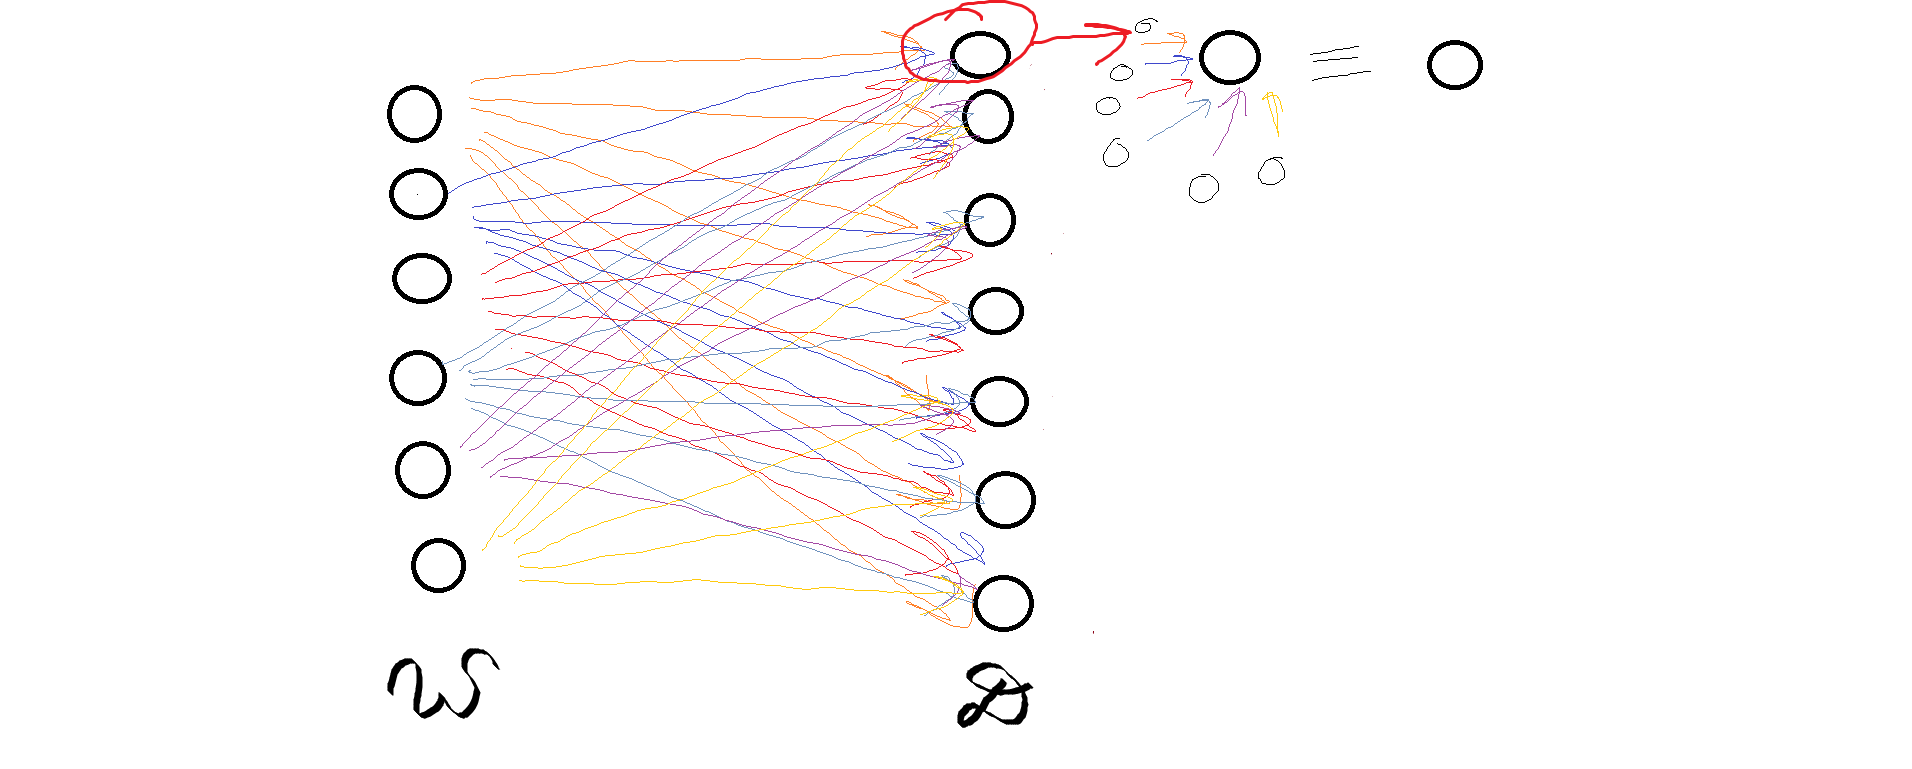

**Write Cycle**

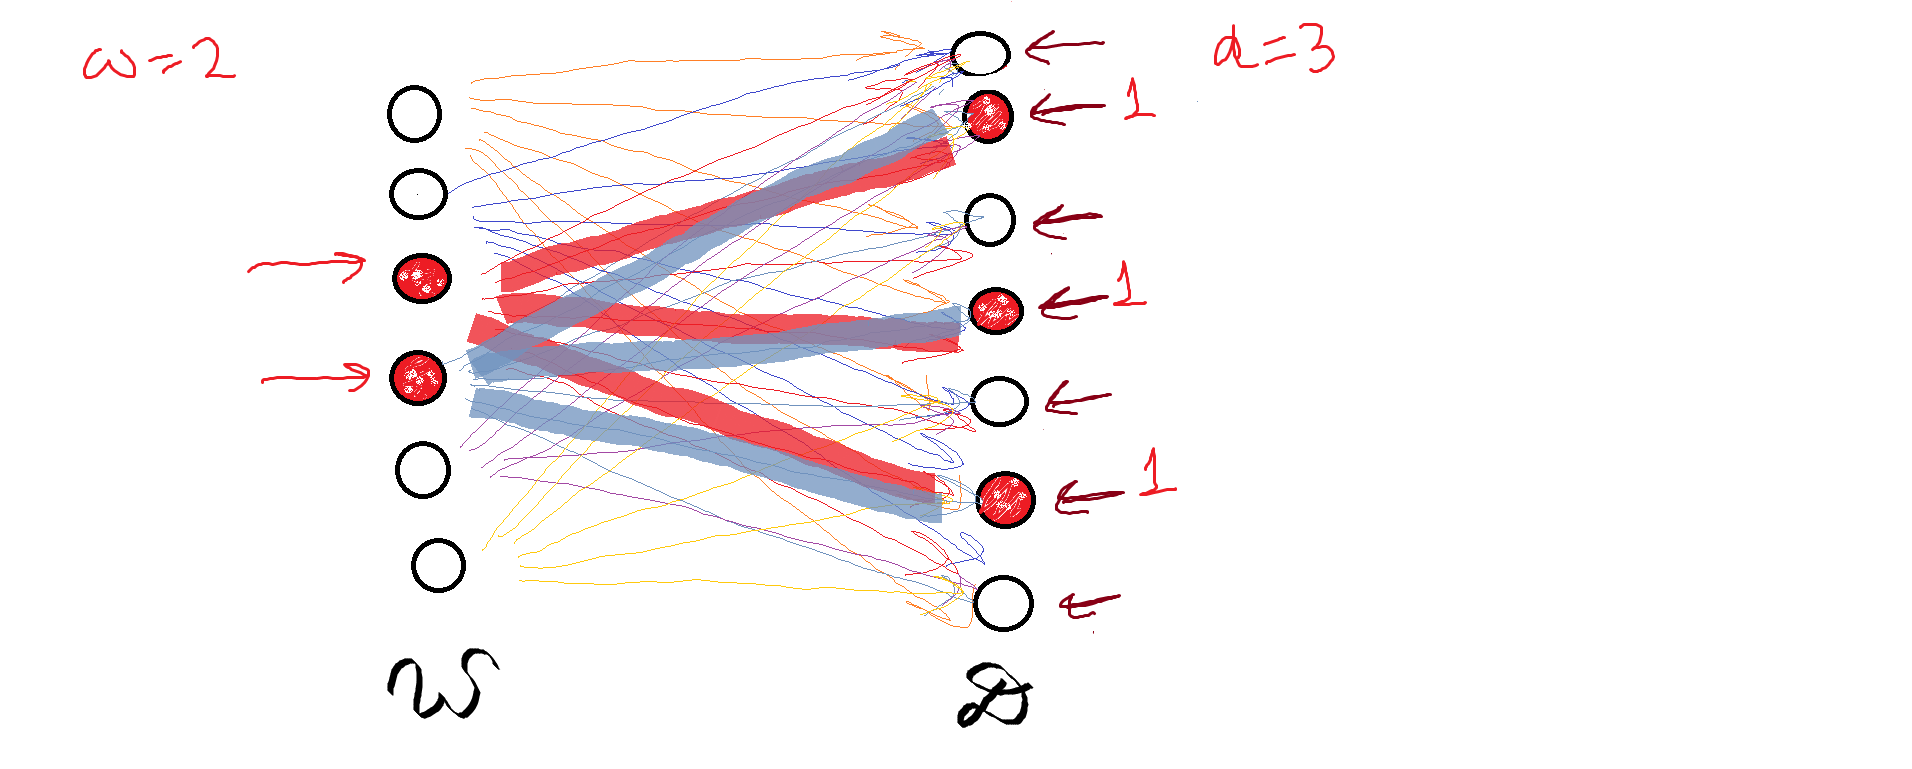

**Read Cycle**

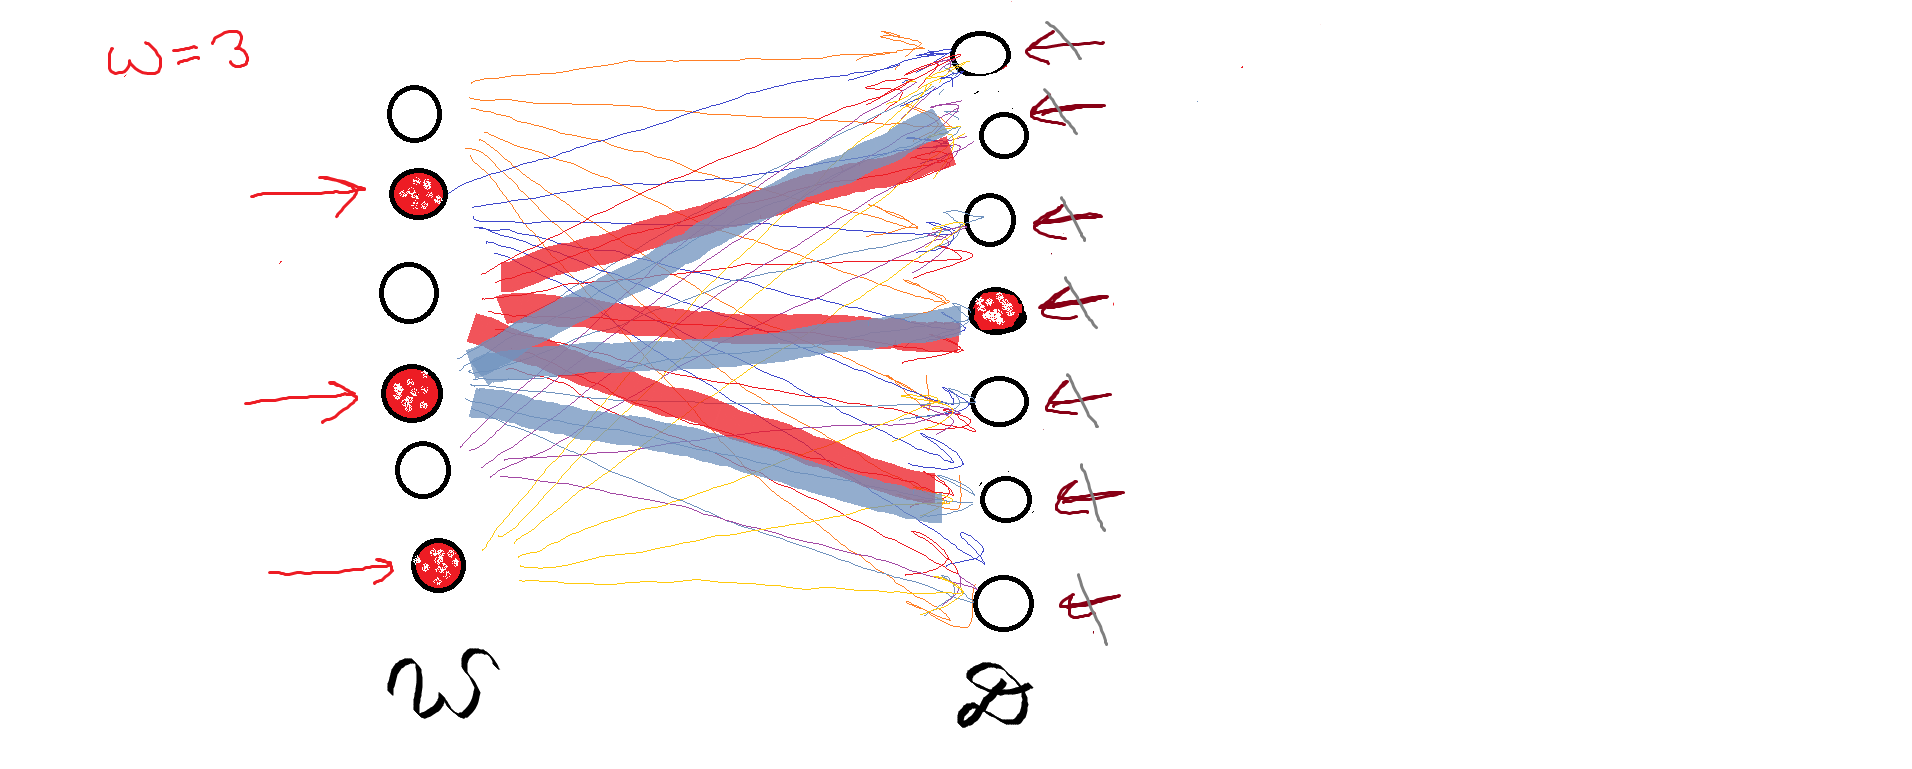

## Code Implementation

In [148]:
!pip install git+https://github.com/BindsNET/bindsnet.git

  Cloning https://github.com/BindsNET/bindsnet.git to /tmp/pip-req-build-mxhxudbg
  Running command git clone -q https://github.com/BindsNET/bindsnet.git /tmp/pip-req-build-mxhxudbg
  Created wheel for BindsNET: filename=BindsNET-0.2.7-cp36-none-any.whl size=95638 sha256=c9f0629fc2c43b7780cf6bc72c2f60850181b97b4624abaa7fbeb909e66b984d
  Stored in directory: /tmp/pip-ephem-wheel-cache-vlu1kxka/wheels/45/a2/fb/ec4c62d26f48339c0d2d77a112ea5725ebf56c046715f8c6df
Successfully built BindsNET


In [149]:
##Making the necessary imports

import torch

from bindsnet.network import Network
from bindsnet.network.nodes import LIFNodes
from bindsnet.network.topology import Connection
from bindsnet.network.monitors import Monitor
from bindsnet.learning import Hebbian, PostPre
import matplotlib.pyplot as plt
from bindsnet.analysis.plotting import plot_spikes, plot_voltages

In [150]:
network = Network()

In [151]:
layer_ip = LIFNodes(n=5)

In [152]:
network.add_layer(
    layer=layer_ip, name="Input source layer"
)

In [153]:
monitor_inp = Monitor(
    obj=layer_ip,
    state_vars=("s"),  # Record spikes and voltages.
    time=500,  # Length of simulation (if known ahead of time).
)

In [154]:
network.add_monitor(monitor=monitor_inp, name="Input source layer")

In [155]:
layer_w = LIFNodes(n=6, traces = True)

In [156]:
network.add_layer(
    layer=layer_w, name="Address Decoder Layer"
)

In [157]:
a = 3
w_address = torch.Tensor([[1,0,1,0,1,0],
                          [0,0,1,1,0,0],
                          [0,1,0,1,1,1],
                          [1,1,0,1,1,1],
                          [1,1,1,0,0,1]])
print(w_address)

tensor([[1., 0., 1., 0., 1., 0.],
        [0., 0., 1., 1., 0., 0.],
        [0., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 0., 0., 1.]])


In [158]:
connection_add = Connection(
    source=layer_ip, target=layer_w, w=w_address
)

In [159]:
network.add_connection(
    connection=connection_add, source="Input source layer", target="Address Decoder Layer"
)

In [160]:
monitor_add = Monitor(
    obj=layer_w,
    state_vars=("s", "v"),  # Record spikes and voltages.
    time=500,  # Length of simulation (if known ahead of time).
)

In [161]:
network.add_monitor(monitor=monitor_add, name="Address Decoder Layer")

In [162]:
layer_d = LIFNodes(n=7, traces= True)

In [163]:
network.add_layer(
    layer=layer_d, name="Data Layer"
)

In [164]:
w_data = torch.Tensor([ [0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0]])

print(w_data)

tensor([[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]])


In [172]:
connection_data = Connection(
    source=layer_w, target=layer_d, w=w_data, update_rule= Hebbian , nu=(1e-4, 1e-2)
)

In [173]:
network.add_connection(
    connection=connection_data, source ="Address Decoder Layer", target = "Data Layer"
)

In [174]:
monitor_data = Monitor(
    obj=layer_d,
    state_vars=("s", "v"),  # Record spikes and voltages.
    time=500,  # Length of simulation (if known ahead of time).
)

In [175]:
network.add_monitor(monitor=monitor_data, name="Data Layer")

### Running Simulations

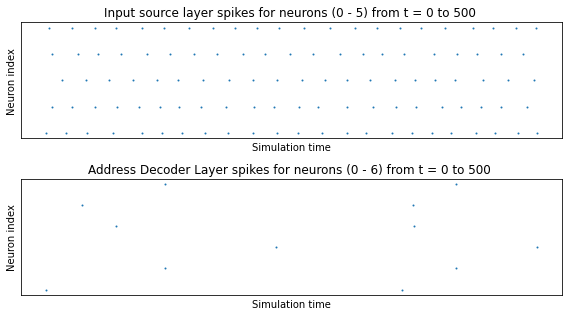

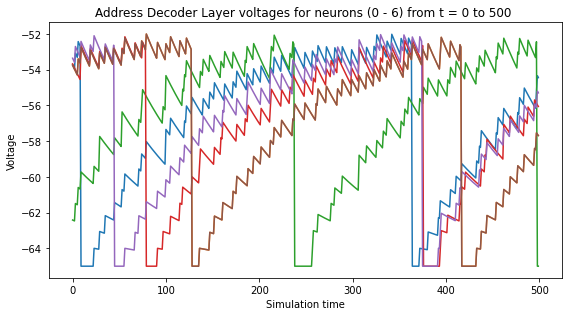

In [176]:
# Simulation time.
time = 500

# Create input spike data, where each spike is distributed according to Bernoulli(0.1).

input_data = torch.bernoulli( 0.8 * torch.ones(time, layer_ip.n)).byte()
inputs = {"Input source layer": input_data}
#print(inputs["Input source layer"].size())
# Simulate network on input data.
network.run(inputs=inputs, time=time)

# Retrieve and plot simulation spike, voltage data from monitors.
spikes = {
    "Input source layer": monitor_inp.get("s"), "Address Decoder Layer": monitor_add.get("s")
}
voltages = {"Address Decoder Layer": monitor_add.get("v")}

plt.ioff()
plot_spikes(spikes)
plot_voltages(voltages, plot_type="line")
plt.show()

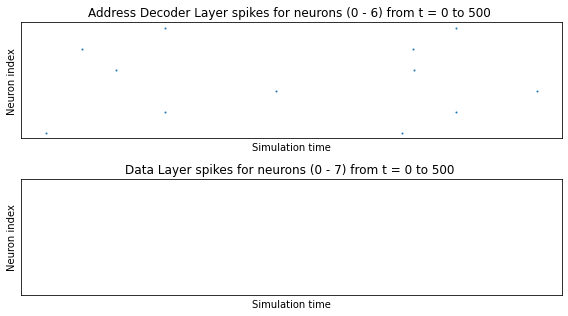

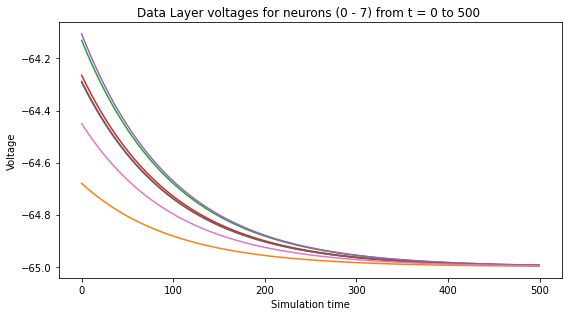

In [179]:
spikes = {
    "Address Decoder Layer": monitor_add.get("s"), "Data Layer": monitor_data.get("s")
}
voltages = {"Data Layer": monitor_data.get("v")}

plt.ioff()
plot_spikes(spikes)
plot_voltages(voltages, plot_type="line")
plt.show()